In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


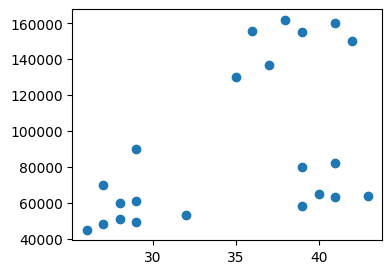

In [125]:
plt.figure(figsize=(4,3))
plt.scatter(df.Age, df['Income($)'])

In [126]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [127]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


Text(0, 0.5, 'Income($)')

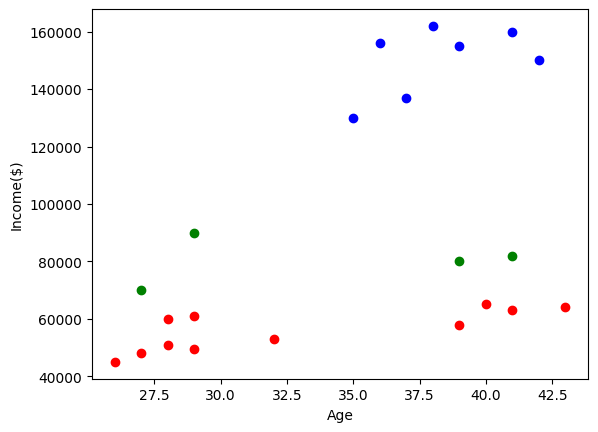

In [128]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(df3.Age, df3['Income($)'], color='green')

plt.xlabel('Age')
plt.ylabel('Income($)')

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [130]:
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [131]:
scaler.fit(df[['Age']])

MinMaxScaler()

In [132]:
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [133]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\nachi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [134]:
df['cluster2'] = y_predicted
df

,Name,Age,Income($),cluster,cluster2
0,Rob,0.058824,0.213675,2,2
1,Michael,0.176471,0.384615,2,2
2,Mohan,0.176471,0.136752,0,2
3,Ismail,0.117647,0.128205,0,2
4,Kory,0.941176,0.897436,1,1
5,Gautam,0.764706,0.940171,1,1
6,David,0.882353,0.982906,1,1
7,Andrea,0.705882,1.000000,1,1
8,Brad,0.588235,0.948718,1,1
9,Angelina,0.529412,0.726496,1,1


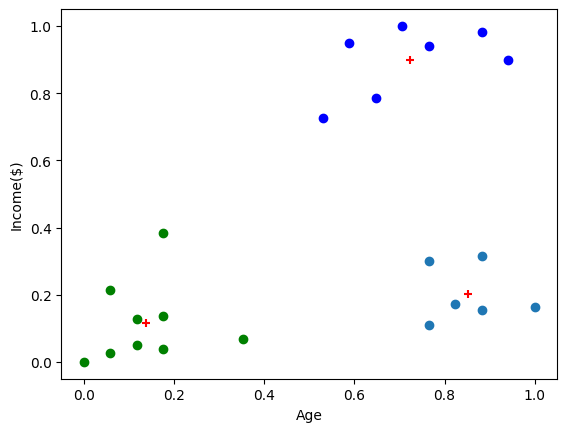

In [135]:
df1 = df[df.cluster2==0]
df2 = df[df.cluster2==1]
df3 = df[df.cluster2==2]

plt.scatter(df1.Age, df1['Income($)'])
plt.scatter(df2.Age, df2['Income($)'], color='blue')
plt.scatter(df3.Age, df3['Income($)'], color='green')

plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='+', color='red')

In [136]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

Elbow Technique to find k

In [144]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [145]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.27612937677853544,
 0.2106667848801052,
 0.17796706251738348,
 0.1327661931978319,
 0.10383752586603562]

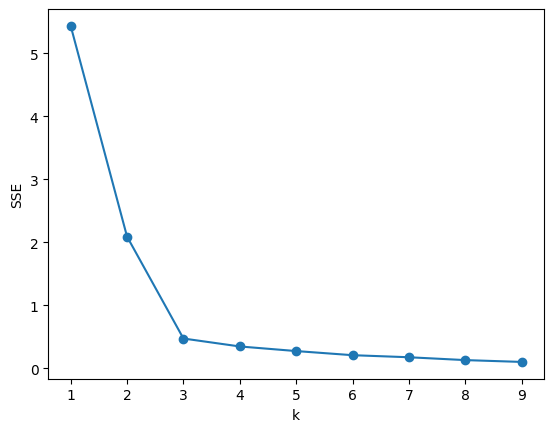

In [147]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng, sse, marker='o')